In [45]:
import os

In [46]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

In [47]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [48]:
diabetes = pd.read_csv ("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis =1)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state =42)

In [50]:
loj = LogisticRegression (solver="liblinear")   
loj_model = loj.fit(X,y)
loj_model


y_predict=loj_model.predict(X_test)
accuracy_score (y_test, y_predict) 

0.7662337662337663

In [51]:
y_predict=loj_model.predict(X_test)
accuracy_score (y_test, y_predict) 

0.7662337662337663

In [52]:
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       151
           1       0.69      0.60      0.64        80

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.77      0.76       231



In [53]:
cross_val_score (loj_model, X_test, y_test, cv = 10).mean()

0.7704710144927536

In [54]:
# veri madenciliği
""" betimleme yöntemleri = 1-kümeleme, 2- karar ağacları, 3- birliktelik çözümlemesi
    
    Tahmin Yöntemleri = 1- regresyon, 2- Sınıflandırma (random forest, support vektor, decison tree) """


' betimleme yöntemleri = 1-kümeleme, 2- karar ağacları, 3- birliktelik çözümlemesi\n    \n    Tahmin Yöntemleri = 1- regresyon, 2- Sınıflandırma (random forest, support vektor, decison tree) '

In [55]:
# makine öğrenmesi
"""  gözetimli ve gözetimsiz öğrenme (kümeleme, birliktelik çözümlemesi)"""

'  gözetimli ve gözetimsiz öğrenme (kümeleme, birliktelik çözümlemesi)'

In [56]:
# KARAR AĞAÇLARI  (herhangi bir varsayıma ihtiyaç duymaz, boş gözlemler için tahmin değerler atıyor.)
""" SAMPLE, EXPLORE, MODİFY, MODEL, ASSESS--->  SEMMA """

# GENELDE RANDOM FOREST ALGORİTMALARI EN İYİ SONUCU VERİYOR.(çoklku karar ağacı diyebiliriz)
# nodes homogenity, nodes with the other nodes heterogenity

' SAMPLE, EXPLORE, MODİFY, MODEL, ASSESS--->  SEMMA '

In [57]:
diabetes = pd.read_csv ("diabetes.csv")
df = diabetes.copy()
df = df.dropna()

In [58]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis =1)
X = pd.DataFrame(X)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state =42)

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [61]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [62]:
!pip install skompiler
!pip install astor
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 0 if x[3] <= 40.5 else 1) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 0 if x[4] <= 57.5 else 1) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (0 if x[1] <= 133.0 else (1 if x[1] <= 135.5 else 0) if x[2] <= 73.0 else
    0) if x[2] <= 94.0 else 1 if x[6] <= 0.6269999742507935 else 0) if x[5] <=
    26.949999809265137 

In [63]:
x =[9]  # 9 olsaydı nasıl bir döngü çalışacaktı örneği
#((0 if x[0]<=2.5 else 0) if x[0]<=6.5 else 1 if x[0].....)

In [64]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7012987012987013

In [65]:
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



In [66]:
# model iyileştirme (model tuning)
cart_model
?cart_model  # detay bilgileri gösteriyor

Object `cart_model  # detay bilgileri gösteriyor` not found.


In [67]:
cart_grid = {"max_depth": range(1,10), "min_samples_split": list(range(2,50))}

In [68]:
cart_ = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV (cart, cart_grid, cv=10, n_jobs = -1, verbose =2)    # n_jobs paralel işlem yap demek
cart_cv_model =cart_cv.fit (X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    3.5s finished


In [69]:
print("En iyi parametreler:" + str(cart_cv_model.best_params_))

En iyi parametreler:{'max_depth': 5, 'min_samples_split': 19}


In [70]:
cart_ = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV (cart, cart_grid, cv=10, n_jobs = 1, verbose =2)    # n_jobs paralel
cart_cv_model =cart_cv.fit (X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] .......

[CV] ................. max_depth=1, min_samples_split=8, total=   0.0s
[CV] max_depth=1, min_samples_split=8 ................................
[CV] ................. max_depth=1, min_samples_split=8, total=   0.0s
[CV] max_depth=1, min_samples_split=8 ................................
[CV] ................. max_depth=1, min_samples_split=8, total=   0.0s
[CV] max_depth=1, min_samples_split=8 ................................
[CV] ................. max_depth=1, min_samples_split=8, total=   0.0s
[CV] max_depth=1, min_samples_split=8 ................................
[CV] ................. max_depth=1, min_samples_split=8, total=   0.0s
[CV] max_depth=1, min_samples_split=8 ................................
[CV] ................. max_depth=1, min_samples_split=8, total=   0.0s
[CV] max_depth=1, min_samples_split=8 ................................
[CV] ................. max_depth=1, min_samples_split=8, total=   0.0s
[CV] max_depth=1, min_samples_split=8 ................................
[CV] .

[CV] ................ max_depth=1, min_samples_split=14, total=   0.0s
[CV] max_depth=1, min_samples_split=14 ...............................
[CV] ................ max_depth=1, min_samples_split=14, total=   0.0s
[CV] max_depth=1, min_samples_split=15 ...............................
[CV] ................ max_depth=1, min_samples_split=15, total=   0.0s
[CV] max_depth=1, min_samples_split=15 ...............................
[CV] ................ max_depth=1, min_samples_split=15, total=   0.0s
[CV] max_depth=1, min_samples_split=15 ...............................
[CV] ................ max_depth=1, min_samples_split=15, total=   0.0s
[CV] max_depth=1, min_samples_split=15 ...............................
[CV] ................ max_depth=1, min_samples_split=15, total=   0.0s
[CV] max_depth=1, min_samples_split=15 ...............................
[CV] ................ max_depth=1, min_samples_split=15, total=   0.0s
[CV] max_depth=1, min_samples_split=15 ...............................
[CV] .

[CV] max_depth=1, min_samples_split=22 ...............................
[CV] ................ max_depth=1, min_samples_split=22, total=   0.0s
[CV] max_depth=1, min_samples_split=22 ...............................
[CV] ................ max_depth=1, min_samples_split=22, total=   0.0s
[CV] max_depth=1, min_samples_split=22 ...............................
[CV] ................ max_depth=1, min_samples_split=22, total=   0.0s
[CV] max_depth=1, min_samples_split=22 ...............................
[CV] ................ max_depth=1, min_samples_split=22, total=   0.0s
[CV] max_depth=1, min_samples_split=22 ...............................
[CV] ................ max_depth=1, min_samples_split=22, total=   0.0s
[CV] max_depth=1, min_samples_split=22 ...............................
[CV] ................ max_depth=1, min_samples_split=22, total=   0.0s
[CV] max_depth=1, min_samples_split=22 ...............................
[CV] ................ max_depth=1, min_samples_split=22, total=   0.0s
[CV] m

[CV] ................ max_depth=1, min_samples_split=29, total=   0.0s
[CV] max_depth=1, min_samples_split=29 ...............................
[CV] ................ max_depth=1, min_samples_split=29, total=   0.0s
[CV] max_depth=1, min_samples_split=29 ...............................
[CV] ................ max_depth=1, min_samples_split=29, total=   0.0s
[CV] max_depth=1, min_samples_split=29 ...............................
[CV] ................ max_depth=1, min_samples_split=29, total=   0.0s
[CV] max_depth=1, min_samples_split=29 ...............................
[CV] ................ max_depth=1, min_samples_split=29, total=   0.0s
[CV] max_depth=1, min_samples_split=29 ...............................
[CV] ................ max_depth=1, min_samples_split=29, total=   0.0s
[CV] max_depth=1, min_samples_split=29 ...............................
[CV] ................ max_depth=1, min_samples_split=29, total=   0.0s
[CV] max_depth=1, min_samples_split=29 ...............................
[CV] .

[CV] ................ max_depth=1, min_samples_split=36, total=   0.0s
[CV] max_depth=1, min_samples_split=36 ...............................
[CV] ................ max_depth=1, min_samples_split=36, total=   0.0s
[CV] max_depth=1, min_samples_split=36 ...............................
[CV] ................ max_depth=1, min_samples_split=36, total=   0.0s
[CV] max_depth=1, min_samples_split=36 ...............................
[CV] ................ max_depth=1, min_samples_split=36, total=   0.0s
[CV] max_depth=1, min_samples_split=36 ...............................
[CV] ................ max_depth=1, min_samples_split=36, total=   0.0s
[CV] max_depth=1, min_samples_split=36 ...............................
[CV] ................ max_depth=1, min_samples_split=36, total=   0.0s
[CV] max_depth=1, min_samples_split=37 ...............................
[CV] ................ max_depth=1, min_samples_split=37, total=   0.0s
[CV] max_depth=1, min_samples_split=37 ...............................
[CV] .

[CV] ................ max_depth=1, min_samples_split=43, total=   0.0s
[CV] max_depth=1, min_samples_split=43 ...............................
[CV] ................ max_depth=1, min_samples_split=43, total=   0.0s
[CV] max_depth=1, min_samples_split=43 ...............................
[CV] ................ max_depth=1, min_samples_split=43, total=   0.0s
[CV] max_depth=1, min_samples_split=44 ...............................
[CV] ................ max_depth=1, min_samples_split=44, total=   0.0s
[CV] max_depth=1, min_samples_split=44 ...............................
[CV] ................ max_depth=1, min_samples_split=44, total=   0.0s
[CV] max_depth=1, min_samples_split=44 ...............................
[CV] ................ max_depth=1, min_samples_split=44, total=   0.0s
[CV] max_depth=1, min_samples_split=44 ...............................
[CV] ................ max_depth=1, min_samples_split=44, total=   0.0s
[CV] max_depth=1, min_samples_split=44 ...............................
[CV] .

[CV] ................. max_depth=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, min_samples_split=2 ................................
[CV] ................. max_depth=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, min_samples_split=2 ................................
[CV] ................. max_depth=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, min_samples_split=2 ................................
[CV] ................. max_depth=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, min_samples_split=2 ................................
[CV] ................. max_depth=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, min_samples_split=2 ................................
[CV] ................. max_depth=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, min_samples_split=3 ................................
[CV] ................. max_depth=2, min_samples_split=3, total=   0.0s
[CV] max_depth=2, min_samples_split=3 ................................
[CV] .

[CV] ................. max_depth=2, min_samples_split=9, total=   0.0s
[CV] max_depth=2, min_samples_split=9 ................................
[CV] ................. max_depth=2, min_samples_split=9, total=   0.0s
[CV] max_depth=2, min_samples_split=9 ................................
[CV] ................. max_depth=2, min_samples_split=9, total=   0.0s
[CV] max_depth=2, min_samples_split=9 ................................
[CV] ................. max_depth=2, min_samples_split=9, total=   0.0s
[CV] max_depth=2, min_samples_split=9 ................................
[CV] ................. max_depth=2, min_samples_split=9, total=   0.0s
[CV] max_depth=2, min_samples_split=9 ................................
[CV] ................. max_depth=2, min_samples_split=9, total=   0.0s
[CV] max_depth=2, min_samples_split=9 ................................
[CV] ................. max_depth=2, min_samples_split=9, total=   0.0s
[CV] max_depth=2, min_samples_split=9 ................................
[CV] .

[CV] ................ max_depth=2, min_samples_split=15, total=   0.0s
[CV] max_depth=2, min_samples_split=16 ...............................
[CV] ................ max_depth=2, min_samples_split=16, total=   0.0s
[CV] max_depth=2, min_samples_split=16 ...............................
[CV] ................ max_depth=2, min_samples_split=16, total=   0.0s
[CV] max_depth=2, min_samples_split=16 ...............................
[CV] ................ max_depth=2, min_samples_split=16, total=   0.0s
[CV] max_depth=2, min_samples_split=16 ...............................
[CV] ................ max_depth=2, min_samples_split=16, total=   0.0s
[CV] max_depth=2, min_samples_split=16 ...............................
[CV] ................ max_depth=2, min_samples_split=16, total=   0.0s
[CV] max_depth=2, min_samples_split=16 ...............................
[CV] ................ max_depth=2, min_samples_split=16, total=   0.0s
[CV] max_depth=2, min_samples_split=16 ...............................
[CV] .

[CV] ................ max_depth=2, min_samples_split=22, total=   0.0s
[CV] max_depth=2, min_samples_split=23 ...............................
[CV] ................ max_depth=2, min_samples_split=23, total=   0.0s
[CV] max_depth=2, min_samples_split=23 ...............................
[CV] ................ max_depth=2, min_samples_split=23, total=   0.0s
[CV] max_depth=2, min_samples_split=23 ...............................
[CV] ................ max_depth=2, min_samples_split=23, total=   0.0s
[CV] max_depth=2, min_samples_split=23 ...............................
[CV] ................ max_depth=2, min_samples_split=23, total=   0.0s
[CV] max_depth=2, min_samples_split=23 ...............................
[CV] ................ max_depth=2, min_samples_split=23, total=   0.0s
[CV] max_depth=2, min_samples_split=23 ...............................
[CV] ................ max_depth=2, min_samples_split=23, total=   0.0s
[CV] max_depth=2, min_samples_split=23 ...............................
[CV] .

[CV] ................ max_depth=2, min_samples_split=29, total=   0.0s
[CV] max_depth=2, min_samples_split=29 ...............................
[CV] ................ max_depth=2, min_samples_split=29, total=   0.0s
[CV] max_depth=2, min_samples_split=30 ...............................
[CV] ................ max_depth=2, min_samples_split=30, total=   0.0s
[CV] max_depth=2, min_samples_split=30 ...............................
[CV] ................ max_depth=2, min_samples_split=30, total=   0.0s
[CV] max_depth=2, min_samples_split=30 ...............................
[CV] ................ max_depth=2, min_samples_split=30, total=   0.0s
[CV] max_depth=2, min_samples_split=30 ...............................
[CV] ................ max_depth=2, min_samples_split=30, total=   0.0s
[CV] max_depth=2, min_samples_split=30 ...............................
[CV] ................ max_depth=2, min_samples_split=30, total=   0.0s
[CV] max_depth=2, min_samples_split=30 ...............................
[CV] .

[CV] ................ max_depth=2, min_samples_split=36, total=   0.0s
[CV] max_depth=2, min_samples_split=36 ...............................
[CV] ................ max_depth=2, min_samples_split=36, total=   0.0s
[CV] max_depth=2, min_samples_split=36 ...............................
[CV] ................ max_depth=2, min_samples_split=36, total=   0.0s
[CV] max_depth=2, min_samples_split=36 ...............................
[CV] ................ max_depth=2, min_samples_split=36, total=   0.0s
[CV] max_depth=2, min_samples_split=36 ...............................
[CV] ................ max_depth=2, min_samples_split=36, total=   0.0s
[CV] max_depth=2, min_samples_split=37 ...............................
[CV] ................ max_depth=2, min_samples_split=37, total=   0.0s
[CV] max_depth=2, min_samples_split=37 ...............................
[CV] ................ max_depth=2, min_samples_split=37, total=   0.0s
[CV] max_depth=2, min_samples_split=37 ...............................
[CV] .

[CV] ................ max_depth=2, min_samples_split=43, total=   0.0s
[CV] max_depth=2, min_samples_split=43 ...............................
[CV] ................ max_depth=2, min_samples_split=43, total=   0.0s
[CV] max_depth=2, min_samples_split=43 ...............................
[CV] ................ max_depth=2, min_samples_split=43, total=   0.0s
[CV] max_depth=2, min_samples_split=43 ...............................
[CV] ................ max_depth=2, min_samples_split=43, total=   0.0s
[CV] max_depth=2, min_samples_split=43 ...............................
[CV] ................ max_depth=2, min_samples_split=43, total=   0.0s
[CV] max_depth=2, min_samples_split=43 ...............................
[CV] ................ max_depth=2, min_samples_split=43, total=   0.0s
[CV] max_depth=2, min_samples_split=43 ...............................
[CV] ................ max_depth=2, min_samples_split=43, total=   0.0s
[CV] max_depth=2, min_samples_split=43 ...............................
[CV] .

[CV] ................. max_depth=3, min_samples_split=2, total=   0.0s
[CV] max_depth=3, min_samples_split=2 ................................
[CV] ................. max_depth=3, min_samples_split=2, total=   0.0s
[CV] max_depth=3, min_samples_split=2 ................................
[CV] ................. max_depth=3, min_samples_split=2, total=   0.0s
[CV] max_depth=3, min_samples_split=2 ................................
[CV] ................. max_depth=3, min_samples_split=2, total=   0.0s
[CV] max_depth=3, min_samples_split=2 ................................
[CV] ................. max_depth=3, min_samples_split=2, total=   0.0s
[CV] max_depth=3, min_samples_split=2 ................................
[CV] ................. max_depth=3, min_samples_split=2, total=   0.0s
[CV] max_depth=3, min_samples_split=2 ................................
[CV] ................. max_depth=3, min_samples_split=2, total=   0.0s
[CV] max_depth=3, min_samples_split=2 ................................
[CV] .

[CV] ................. max_depth=3, min_samples_split=8, total=   0.0s
[CV] max_depth=3, min_samples_split=8 ................................
[CV] ................. max_depth=3, min_samples_split=8, total=   0.0s
[CV] max_depth=3, min_samples_split=8 ................................
[CV] ................. max_depth=3, min_samples_split=8, total=   0.0s
[CV] max_depth=3, min_samples_split=9 ................................
[CV] ................. max_depth=3, min_samples_split=9, total=   0.0s
[CV] max_depth=3, min_samples_split=9 ................................
[CV] ................. max_depth=3, min_samples_split=9, total=   0.0s
[CV] max_depth=3, min_samples_split=9 ................................
[CV] ................. max_depth=3, min_samples_split=9, total=   0.0s
[CV] max_depth=3, min_samples_split=9 ................................
[CV] ................. max_depth=3, min_samples_split=9, total=   0.0s
[CV] max_depth=3, min_samples_split=9 ................................
[CV] .

[CV] ................ max_depth=3, min_samples_split=15, total=   0.0s
[CV] max_depth=3, min_samples_split=15 ...............................
[CV] ................ max_depth=3, min_samples_split=15, total=   0.0s
[CV] max_depth=3, min_samples_split=15 ...............................
[CV] ................ max_depth=3, min_samples_split=15, total=   0.0s
[CV] max_depth=3, min_samples_split=15 ...............................
[CV] ................ max_depth=3, min_samples_split=15, total=   0.0s
[CV] max_depth=3, min_samples_split=15 ...............................
[CV] ................ max_depth=3, min_samples_split=15, total=   0.0s
[CV] max_depth=3, min_samples_split=15 ...............................
[CV] ................ max_depth=3, min_samples_split=15, total=   0.0s
[CV] max_depth=3, min_samples_split=15 ...............................
[CV] ................ max_depth=3, min_samples_split=15, total=   0.0s
[CV] max_depth=3, min_samples_split=15 ...............................
[CV] .

[CV] ................ max_depth=3, min_samples_split=21, total=   0.0s
[CV] max_depth=3, min_samples_split=21 ...............................
[CV] ................ max_depth=3, min_samples_split=21, total=   0.0s
[CV] max_depth=3, min_samples_split=21 ...............................
[CV] ................ max_depth=3, min_samples_split=21, total=   0.0s
[CV] max_depth=3, min_samples_split=21 ...............................
[CV] ................ max_depth=3, min_samples_split=21, total=   0.0s
[CV] max_depth=3, min_samples_split=22 ...............................
[CV] ................ max_depth=3, min_samples_split=22, total=   0.0s
[CV] max_depth=3, min_samples_split=22 ...............................
[CV] ................ max_depth=3, min_samples_split=22, total=   0.0s
[CV] max_depth=3, min_samples_split=22 ...............................
[CV] ................ max_depth=3, min_samples_split=22, total=   0.0s
[CV] max_depth=3, min_samples_split=22 ...............................
[CV] .

[CV] max_depth=3, min_samples_split=28 ...............................
[CV] ................ max_depth=3, min_samples_split=28, total=   0.0s
[CV] max_depth=3, min_samples_split=28 ...............................
[CV] ................ max_depth=3, min_samples_split=28, total=   0.0s
[CV] max_depth=3, min_samples_split=28 ...............................
[CV] ................ max_depth=3, min_samples_split=28, total=   0.0s
[CV] max_depth=3, min_samples_split=28 ...............................
[CV] ................ max_depth=3, min_samples_split=28, total=   0.0s
[CV] max_depth=3, min_samples_split=28 ...............................
[CV] ................ max_depth=3, min_samples_split=28, total=   0.0s
[CV] max_depth=3, min_samples_split=28 ...............................
[CV] ................ max_depth=3, min_samples_split=28, total=   0.0s
[CV] max_depth=3, min_samples_split=28 ...............................
[CV] ................ max_depth=3, min_samples_split=28, total=   0.0s
[CV] m

[CV] ................ max_depth=3, min_samples_split=34, total=   0.0s
[CV] max_depth=3, min_samples_split=34 ...............................
[CV] ................ max_depth=3, min_samples_split=34, total=   0.0s
[CV] max_depth=3, min_samples_split=34 ...............................
[CV] ................ max_depth=3, min_samples_split=34, total=   0.0s
[CV] max_depth=3, min_samples_split=34 ...............................
[CV] ................ max_depth=3, min_samples_split=34, total=   0.0s
[CV] max_depth=3, min_samples_split=34 ...............................
[CV] ................ max_depth=3, min_samples_split=34, total=   0.0s
[CV] max_depth=3, min_samples_split=34 ...............................
[CV] ................ max_depth=3, min_samples_split=34, total=   0.0s
[CV] max_depth=3, min_samples_split=35 ...............................
[CV] ................ max_depth=3, min_samples_split=35, total=   0.0s
[CV] max_depth=3, min_samples_split=35 ...............................
[CV] .

[CV] ................ max_depth=3, min_samples_split=40, total=   0.0s
[CV] max_depth=3, min_samples_split=41 ...............................
[CV] ................ max_depth=3, min_samples_split=41, total=   0.0s
[CV] max_depth=3, min_samples_split=41 ...............................
[CV] ................ max_depth=3, min_samples_split=41, total=   0.0s
[CV] max_depth=3, min_samples_split=41 ...............................
[CV] ................ max_depth=3, min_samples_split=41, total=   0.0s
[CV] max_depth=3, min_samples_split=41 ...............................
[CV] ................ max_depth=3, min_samples_split=41, total=   0.0s
[CV] max_depth=3, min_samples_split=41 ...............................
[CV] ................ max_depth=3, min_samples_split=41, total=   0.0s
[CV] max_depth=3, min_samples_split=41 ...............................
[CV] ................ max_depth=3, min_samples_split=41, total=   0.0s
[CV] max_depth=3, min_samples_split=41 ...............................
[CV] .

[CV] ................ max_depth=3, min_samples_split=47, total=   0.0s
[CV] max_depth=3, min_samples_split=47 ...............................
[CV] ................ max_depth=3, min_samples_split=47, total=   0.0s
[CV] max_depth=3, min_samples_split=47 ...............................
[CV] ................ max_depth=3, min_samples_split=47, total=   0.0s
[CV] max_depth=3, min_samples_split=47 ...............................
[CV] ................ max_depth=3, min_samples_split=47, total=   0.0s
[CV] max_depth=3, min_samples_split=47 ...............................
[CV] ................ max_depth=3, min_samples_split=47, total=   0.0s
[CV] max_depth=3, min_samples_split=47 ...............................
[CV] ................ max_depth=3, min_samples_split=47, total=   0.0s
[CV] max_depth=3, min_samples_split=48 ...............................
[CV] ................ max_depth=3, min_samples_split=48, total=   0.0s
[CV] max_depth=3, min_samples_split=48 ...............................
[CV] .

[CV] ................. max_depth=4, min_samples_split=5, total=   0.0s
[CV] max_depth=4, min_samples_split=5 ................................
[CV] ................. max_depth=4, min_samples_split=5, total=   0.0s
[CV] max_depth=4, min_samples_split=6 ................................
[CV] ................. max_depth=4, min_samples_split=6, total=   0.0s
[CV] max_depth=4, min_samples_split=6 ................................
[CV] ................. max_depth=4, min_samples_split=6, total=   0.0s
[CV] max_depth=4, min_samples_split=6 ................................
[CV] ................. max_depth=4, min_samples_split=6, total=   0.0s
[CV] max_depth=4, min_samples_split=6 ................................
[CV] ................. max_depth=4, min_samples_split=6, total=   0.0s
[CV] max_depth=4, min_samples_split=6 ................................
[CV] ................. max_depth=4, min_samples_split=6, total=   0.0s
[CV] max_depth=4, min_samples_split=6 ................................
[CV] .

[CV] ................ max_depth=4, min_samples_split=11, total=   0.0s
[CV] max_depth=4, min_samples_split=11 ...............................
[CV] ................ max_depth=4, min_samples_split=11, total=   0.0s
[CV] max_depth=4, min_samples_split=12 ...............................
[CV] ................ max_depth=4, min_samples_split=12, total=   0.0s
[CV] max_depth=4, min_samples_split=12 ...............................
[CV] ................ max_depth=4, min_samples_split=12, total=   0.0s
[CV] max_depth=4, min_samples_split=12 ...............................
[CV] ................ max_depth=4, min_samples_split=12, total=   0.0s
[CV] max_depth=4, min_samples_split=12 ...............................
[CV] ................ max_depth=4, min_samples_split=12, total=   0.0s
[CV] max_depth=4, min_samples_split=12 ...............................
[CV] ................ max_depth=4, min_samples_split=12, total=   0.0s
[CV] max_depth=4, min_samples_split=12 ...............................
[CV] .

[CV] ................ max_depth=4, min_samples_split=17, total=   0.0s
[CV] max_depth=4, min_samples_split=18 ...............................
[CV] ................ max_depth=4, min_samples_split=18, total=   0.0s
[CV] max_depth=4, min_samples_split=18 ...............................
[CV] ................ max_depth=4, min_samples_split=18, total=   0.0s
[CV] max_depth=4, min_samples_split=18 ...............................
[CV] ................ max_depth=4, min_samples_split=18, total=   0.0s
[CV] max_depth=4, min_samples_split=18 ...............................
[CV] ................ max_depth=4, min_samples_split=18, total=   0.0s
[CV] max_depth=4, min_samples_split=18 ...............................
[CV] ................ max_depth=4, min_samples_split=18, total=   0.0s
[CV] max_depth=4, min_samples_split=18 ...............................
[CV] ................ max_depth=4, min_samples_split=18, total=   0.0s
[CV] max_depth=4, min_samples_split=18 ...............................
[CV] .

[CV] ................ max_depth=4, min_samples_split=24, total=   0.0s
[CV] max_depth=4, min_samples_split=24 ...............................
[CV] ................ max_depth=4, min_samples_split=24, total=   0.0s
[CV] max_depth=4, min_samples_split=24 ...............................
[CV] ................ max_depth=4, min_samples_split=24, total=   0.0s
[CV] max_depth=4, min_samples_split=24 ...............................
[CV] ................ max_depth=4, min_samples_split=24, total=   0.0s
[CV] max_depth=4, min_samples_split=24 ...............................
[CV] ................ max_depth=4, min_samples_split=24, total=   0.0s
[CV] max_depth=4, min_samples_split=24 ...............................
[CV] ................ max_depth=4, min_samples_split=24, total=   0.0s
[CV] max_depth=4, min_samples_split=24 ...............................
[CV] ................ max_depth=4, min_samples_split=24, total=   0.0s
[CV] max_depth=4, min_samples_split=24 ...............................
[CV] .

[CV] ................ max_depth=4, min_samples_split=34, total=   0.0s
[CV] max_depth=4, min_samples_split=34 ...............................
[CV] ................ max_depth=4, min_samples_split=34, total=   0.0s
[CV] max_depth=4, min_samples_split=34 ...............................
[CV] ................ max_depth=4, min_samples_split=34, total=   0.0s
[CV] max_depth=4, min_samples_split=34 ...............................
[CV] ................ max_depth=4, min_samples_split=34, total=   0.0s
[CV] max_depth=4, min_samples_split=34 ...............................
[CV] ................ max_depth=4, min_samples_split=34, total=   0.0s
[CV] max_depth=4, min_samples_split=34 ...............................
[CV] ................ max_depth=4, min_samples_split=34, total=   0.0s
[CV] max_depth=4, min_samples_split=34 ...............................
[CV] ................ max_depth=4, min_samples_split=34, total=   0.0s
[CV] max_depth=4, min_samples_split=35 ...............................
[CV] .

[CV] ................ max_depth=4, min_samples_split=40, total=   0.0s
[CV] max_depth=4, min_samples_split=40 ...............................
[CV] ................ max_depth=4, min_samples_split=40, total=   0.0s
[CV] max_depth=4, min_samples_split=40 ...............................
[CV] ................ max_depth=4, min_samples_split=40, total=   0.0s
[CV] max_depth=4, min_samples_split=40 ...............................
[CV] ................ max_depth=4, min_samples_split=40, total=   0.0s
[CV] max_depth=4, min_samples_split=40 ...............................
[CV] ................ max_depth=4, min_samples_split=40, total=   0.0s
[CV] max_depth=4, min_samples_split=40 ...............................
[CV] ................ max_depth=4, min_samples_split=40, total=   0.0s
[CV] max_depth=4, min_samples_split=40 ...............................
[CV] ................ max_depth=4, min_samples_split=40, total=   0.0s
[CV] max_depth=4, min_samples_split=40 ...............................
[CV] .

[CV] ................. max_depth=5, min_samples_split=2, total=   0.0s
[CV] max_depth=5, min_samples_split=2 ................................
[CV] ................. max_depth=5, min_samples_split=2, total=   0.0s
[CV] max_depth=5, min_samples_split=2 ................................
[CV] ................. max_depth=5, min_samples_split=2, total=   0.0s
[CV] max_depth=5, min_samples_split=2 ................................
[CV] ................. max_depth=5, min_samples_split=2, total=   0.0s
[CV] max_depth=5, min_samples_split=2 ................................
[CV] ................. max_depth=5, min_samples_split=2, total=   0.0s
[CV] max_depth=5, min_samples_split=2 ................................
[CV] ................. max_depth=5, min_samples_split=2, total=   0.0s
[CV] max_depth=5, min_samples_split=2 ................................
[CV] ................. max_depth=5, min_samples_split=2, total=   0.0s
[CV] max_depth=5, min_samples_split=2 ................................
[CV] .

[CV] ................. max_depth=5, min_samples_split=8, total=   0.0s
[CV] max_depth=5, min_samples_split=8 ................................
[CV] ................. max_depth=5, min_samples_split=8, total=   0.0s
[CV] max_depth=5, min_samples_split=8 ................................
[CV] ................. max_depth=5, min_samples_split=8, total=   0.0s
[CV] max_depth=5, min_samples_split=8 ................................
[CV] ................. max_depth=5, min_samples_split=8, total=   0.0s
[CV] max_depth=5, min_samples_split=8 ................................
[CV] ................. max_depth=5, min_samples_split=8, total=   0.0s
[CV] max_depth=5, min_samples_split=8 ................................
[CV] ................. max_depth=5, min_samples_split=8, total=   0.0s
[CV] max_depth=5, min_samples_split=8 ................................
[CV] ................. max_depth=5, min_samples_split=8, total=   0.0s
[CV] max_depth=5, min_samples_split=8 ................................
[CV] .

[CV] ................ max_depth=5, min_samples_split=13, total=   0.0s
[CV] max_depth=5, min_samples_split=14 ...............................
[CV] ................ max_depth=5, min_samples_split=14, total=   0.0s
[CV] max_depth=5, min_samples_split=14 ...............................
[CV] ................ max_depth=5, min_samples_split=14, total=   0.0s
[CV] max_depth=5, min_samples_split=14 ...............................
[CV] ................ max_depth=5, min_samples_split=14, total=   0.0s
[CV] max_depth=5, min_samples_split=14 ...............................
[CV] ................ max_depth=5, min_samples_split=14, total=   0.0s
[CV] max_depth=5, min_samples_split=14 ...............................
[CV] ................ max_depth=5, min_samples_split=14, total=   0.0s
[CV] max_depth=5, min_samples_split=14 ...............................
[CV] ................ max_depth=5, min_samples_split=14, total=   0.0s
[CV] max_depth=5, min_samples_split=14 ...............................
[CV] .

[CV] ................ max_depth=5, min_samples_split=19, total=   0.0s
[CV] max_depth=5, min_samples_split=19 ...............................
[CV] ................ max_depth=5, min_samples_split=19, total=   0.0s
[CV] max_depth=5, min_samples_split=20 ...............................
[CV] ................ max_depth=5, min_samples_split=20, total=   0.0s
[CV] max_depth=5, min_samples_split=20 ...............................
[CV] ................ max_depth=5, min_samples_split=20, total=   0.0s
[CV] max_depth=5, min_samples_split=20 ...............................
[CV] ................ max_depth=5, min_samples_split=20, total=   0.0s
[CV] max_depth=5, min_samples_split=20 ...............................
[CV] ................ max_depth=5, min_samples_split=20, total=   0.0s
[CV] max_depth=5, min_samples_split=20 ...............................
[CV] ................ max_depth=5, min_samples_split=20, total=   0.0s
[CV] max_depth=5, min_samples_split=20 ...............................
[CV] .

[CV] ................ max_depth=5, min_samples_split=30, total=   0.0s
[CV] max_depth=5, min_samples_split=30 ...............................
[CV] ................ max_depth=5, min_samples_split=30, total=   0.0s
[CV] max_depth=5, min_samples_split=30 ...............................
[CV] ................ max_depth=5, min_samples_split=30, total=   0.0s
[CV] max_depth=5, min_samples_split=31 ...............................
[CV] ................ max_depth=5, min_samples_split=31, total=   0.0s
[CV] max_depth=5, min_samples_split=31 ...............................
[CV] ................ max_depth=5, min_samples_split=31, total=   0.0s
[CV] max_depth=5, min_samples_split=31 ...............................
[CV] ................ max_depth=5, min_samples_split=31, total=   0.0s
[CV] max_depth=5, min_samples_split=31 ...............................
[CV] ................ max_depth=5, min_samples_split=31, total=   0.0s
[CV] max_depth=5, min_samples_split=31 ...............................
[CV] .

[CV] ................ max_depth=5, min_samples_split=36, total=   0.0s
[CV] max_depth=5, min_samples_split=36 ...............................
[CV] ................ max_depth=5, min_samples_split=36, total=   0.0s
[CV] max_depth=5, min_samples_split=36 ...............................
[CV] ................ max_depth=5, min_samples_split=36, total=   0.0s
[CV] max_depth=5, min_samples_split=36 ...............................
[CV] ................ max_depth=5, min_samples_split=36, total=   0.0s
[CV] max_depth=5, min_samples_split=36 ...............................
[CV] ................ max_depth=5, min_samples_split=36, total=   0.0s
[CV] max_depth=5, min_samples_split=37 ...............................
[CV] ................ max_depth=5, min_samples_split=37, total=   0.0s
[CV] max_depth=5, min_samples_split=37 ...............................
[CV] ................ max_depth=5, min_samples_split=37, total=   0.0s
[CV] max_depth=5, min_samples_split=37 ...............................
[CV] .

[CV] ................ max_depth=5, min_samples_split=42, total=   0.0s
[CV] max_depth=5, min_samples_split=42 ...............................
[CV] ................ max_depth=5, min_samples_split=42, total=   0.0s
[CV] max_depth=5, min_samples_split=42 ...............................
[CV] ................ max_depth=5, min_samples_split=42, total=   0.0s
[CV] max_depth=5, min_samples_split=42 ...............................
[CV] ................ max_depth=5, min_samples_split=42, total=   0.0s
[CV] max_depth=5, min_samples_split=42 ...............................
[CV] ................ max_depth=5, min_samples_split=42, total=   0.0s
[CV] max_depth=5, min_samples_split=43 ...............................
[CV] ................ max_depth=5, min_samples_split=43, total=   0.0s
[CV] max_depth=5, min_samples_split=43 ...............................
[CV] ................ max_depth=5, min_samples_split=43, total=   0.0s
[CV] max_depth=5, min_samples_split=43 ...............................
[CV] .

[CV] ................ max_depth=5, min_samples_split=48, total=   0.0s
[CV] max_depth=5, min_samples_split=48 ...............................
[CV] ................ max_depth=5, min_samples_split=48, total=   0.0s
[CV] max_depth=5, min_samples_split=48 ...............................
[CV] ................ max_depth=5, min_samples_split=48, total=   0.0s
[CV] max_depth=5, min_samples_split=49 ...............................
[CV] ................ max_depth=5, min_samples_split=49, total=   0.0s
[CV] max_depth=5, min_samples_split=49 ...............................
[CV] ................ max_depth=5, min_samples_split=49, total=   0.0s
[CV] max_depth=5, min_samples_split=49 ...............................
[CV] ................ max_depth=5, min_samples_split=49, total=   0.0s
[CV] max_depth=5, min_samples_split=49 ...............................
[CV] ................ max_depth=5, min_samples_split=49, total=   0.0s
[CV] max_depth=5, min_samples_split=49 ...............................
[CV] .

[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=7 ................................
[CV] ................. max_depth=6, min_samples_split=7, total=   0.0s
[CV] max_depth=6, min_samples_split=7 ................................
[CV] ................. max_depth=6, min_samples_split=7, total=   0.0s
[CV] max_depth=6, min_samples_split=7 ................................
[CV] .

[CV] ................ max_depth=6, min_samples_split=17, total=   0.0s
[CV] max_depth=6, min_samples_split=17 ...............................
[CV] ................ max_depth=6, min_samples_split=17, total=   0.0s
[CV] max_depth=6, min_samples_split=17 ...............................
[CV] ................ max_depth=6, min_samples_split=17, total=   0.0s
[CV] max_depth=6, min_samples_split=17 ...............................
[CV] ................ max_depth=6, min_samples_split=17, total=   0.0s
[CV] max_depth=6, min_samples_split=17 ...............................
[CV] ................ max_depth=6, min_samples_split=17, total=   0.0s
[CV] max_depth=6, min_samples_split=17 ...............................
[CV] ................ max_depth=6, min_samples_split=17, total=   0.0s
[CV] max_depth=6, min_samples_split=17 ...............................
[CV] ................ max_depth=6, min_samples_split=17, total=   0.0s
[CV] max_depth=6, min_samples_split=17 ...............................
[CV] .

[CV] max_depth=6, min_samples_split=23 ...............................
[CV] ................ max_depth=6, min_samples_split=23, total=   0.0s
[CV] max_depth=6, min_samples_split=23 ...............................
[CV] ................ max_depth=6, min_samples_split=23, total=   0.0s
[CV] max_depth=6, min_samples_split=23 ...............................
[CV] ................ max_depth=6, min_samples_split=23, total=   0.0s
[CV] max_depth=6, min_samples_split=23 ...............................
[CV] ................ max_depth=6, min_samples_split=23, total=   0.0s
[CV] max_depth=6, min_samples_split=23 ...............................
[CV] ................ max_depth=6, min_samples_split=23, total=   0.0s
[CV] max_depth=6, min_samples_split=23 ...............................
[CV] ................ max_depth=6, min_samples_split=23, total=   0.0s
[CV] max_depth=6, min_samples_split=23 ...............................
[CV] ................ max_depth=6, min_samples_split=23, total=   0.0s
[CV] m

[CV] ................ max_depth=6, min_samples_split=33, total=   0.0s
[CV] max_depth=6, min_samples_split=34 ...............................
[CV] ................ max_depth=6, min_samples_split=34, total=   0.0s
[CV] max_depth=6, min_samples_split=34 ...............................
[CV] ................ max_depth=6, min_samples_split=34, total=   0.0s
[CV] max_depth=6, min_samples_split=34 ...............................
[CV] ................ max_depth=6, min_samples_split=34, total=   0.0s
[CV] max_depth=6, min_samples_split=34 ...............................
[CV] ................ max_depth=6, min_samples_split=34, total=   0.0s
[CV] max_depth=6, min_samples_split=34 ...............................
[CV] ................ max_depth=6, min_samples_split=34, total=   0.0s
[CV] max_depth=6, min_samples_split=34 ...............................
[CV] ................ max_depth=6, min_samples_split=34, total=   0.0s
[CV] max_depth=6, min_samples_split=34 ...............................
[CV] .

[CV] ................ max_depth=6, min_samples_split=39, total=   0.0s
[CV] max_depth=6, min_samples_split=39 ...............................
[CV] ................ max_depth=6, min_samples_split=39, total=   0.0s
[CV] max_depth=6, min_samples_split=39 ...............................
[CV] ................ max_depth=6, min_samples_split=39, total=   0.0s
[CV] max_depth=6, min_samples_split=40 ...............................
[CV] ................ max_depth=6, min_samples_split=40, total=   0.0s
[CV] max_depth=6, min_samples_split=40 ...............................
[CV] ................ max_depth=6, min_samples_split=40, total=   0.0s
[CV] max_depth=6, min_samples_split=40 ...............................
[CV] ................ max_depth=6, min_samples_split=40, total=   0.0s
[CV] max_depth=6, min_samples_split=40 ...............................
[CV] ................ max_depth=6, min_samples_split=40, total=   0.0s
[CV] max_depth=6, min_samples_split=40 ...............................
[CV] .

[CV] ................ max_depth=6, min_samples_split=45, total=   0.0s
[CV] max_depth=6, min_samples_split=45 ...............................
[CV] ................ max_depth=6, min_samples_split=45, total=   0.0s
[CV] max_depth=6, min_samples_split=45 ...............................
[CV] ................ max_depth=6, min_samples_split=45, total=   0.0s
[CV] max_depth=6, min_samples_split=46 ...............................
[CV] ................ max_depth=6, min_samples_split=46, total=   0.0s
[CV] max_depth=6, min_samples_split=46 ...............................
[CV] ................ max_depth=6, min_samples_split=46, total=   0.0s
[CV] max_depth=6, min_samples_split=46 ...............................
[CV] ................ max_depth=6, min_samples_split=46, total=   0.0s
[CV] max_depth=6, min_samples_split=46 ...............................
[CV] ................ max_depth=6, min_samples_split=46, total=   0.0s
[CV] max_depth=6, min_samples_split=46 ...............................
[CV] .

[CV] ................. max_depth=7, min_samples_split=8, total=   0.0s
[CV] max_depth=7, min_samples_split=8 ................................
[CV] ................. max_depth=7, min_samples_split=8, total=   0.0s
[CV] max_depth=7, min_samples_split=8 ................................
[CV] ................. max_depth=7, min_samples_split=8, total=   0.0s
[CV] max_depth=7, min_samples_split=8 ................................
[CV] ................. max_depth=7, min_samples_split=8, total=   0.0s
[CV] max_depth=7, min_samples_split=8 ................................
[CV] ................. max_depth=7, min_samples_split=8, total=   0.0s
[CV] max_depth=7, min_samples_split=8 ................................
[CV] ................. max_depth=7, min_samples_split=8, total=   0.0s
[CV] max_depth=7, min_samples_split=9 ................................
[CV] ................. max_depth=7, min_samples_split=9, total=   0.0s
[CV] max_depth=7, min_samples_split=9 ................................
[CV] .

[CV] ................ max_depth=7, min_samples_split=14, total=   0.0s
[CV] max_depth=7, min_samples_split=14 ...............................
[CV] ................ max_depth=7, min_samples_split=14, total=   0.0s
[CV] max_depth=7, min_samples_split=14 ...............................
[CV] ................ max_depth=7, min_samples_split=14, total=   0.0s
[CV] max_depth=7, min_samples_split=14 ...............................
[CV] ................ max_depth=7, min_samples_split=14, total=   0.0s
[CV] max_depth=7, min_samples_split=14 ...............................
[CV] ................ max_depth=7, min_samples_split=14, total=   0.0s
[CV] max_depth=7, min_samples_split=14 ...............................
[CV] ................ max_depth=7, min_samples_split=14, total=   0.0s
[CV] max_depth=7, min_samples_split=14 ...............................
[CV] ................ max_depth=7, min_samples_split=14, total=   0.0s
[CV] max_depth=7, min_samples_split=15 ...............................
[CV] .

[CV] ................ max_depth=7, min_samples_split=24, total=   0.0s
[CV] max_depth=7, min_samples_split=24 ...............................
[CV] ................ max_depth=7, min_samples_split=24, total=   0.0s
[CV] max_depth=7, min_samples_split=24 ...............................
[CV] ................ max_depth=7, min_samples_split=24, total=   0.0s
[CV] max_depth=7, min_samples_split=24 ...............................
[CV] ................ max_depth=7, min_samples_split=24, total=   0.0s
[CV] max_depth=7, min_samples_split=25 ...............................
[CV] ................ max_depth=7, min_samples_split=25, total=   0.0s
[CV] max_depth=7, min_samples_split=25 ...............................
[CV] ................ max_depth=7, min_samples_split=25, total=   0.0s
[CV] max_depth=7, min_samples_split=25 ...............................
[CV] ................ max_depth=7, min_samples_split=25, total=   0.0s
[CV] max_depth=7, min_samples_split=25 ...............................
[CV] .

[CV] ................ max_depth=7, min_samples_split=30, total=   0.0s
[CV] max_depth=7, min_samples_split=30 ...............................
[CV] ................ max_depth=7, min_samples_split=30, total=   0.0s
[CV] max_depth=7, min_samples_split=31 ...............................
[CV] ................ max_depth=7, min_samples_split=31, total=   0.0s
[CV] max_depth=7, min_samples_split=31 ...............................
[CV] ................ max_depth=7, min_samples_split=31, total=   0.0s
[CV] max_depth=7, min_samples_split=31 ...............................
[CV] ................ max_depth=7, min_samples_split=31, total=   0.0s
[CV] max_depth=7, min_samples_split=31 ...............................
[CV] ................ max_depth=7, min_samples_split=31, total=   0.0s
[CV] max_depth=7, min_samples_split=31 ...............................
[CV] ................ max_depth=7, min_samples_split=31, total=   0.0s
[CV] max_depth=7, min_samples_split=31 ...............................
[CV] .

[CV] ................ max_depth=7, min_samples_split=41, total=   0.0s
[CV] max_depth=7, min_samples_split=41 ...............................
[CV] ................ max_depth=7, min_samples_split=41, total=   0.0s
[CV] max_depth=7, min_samples_split=41 ...............................
[CV] ................ max_depth=7, min_samples_split=41, total=   0.0s
[CV] max_depth=7, min_samples_split=41 ...............................
[CV] ................ max_depth=7, min_samples_split=41, total=   0.0s
[CV] max_depth=7, min_samples_split=41 ...............................
[CV] ................ max_depth=7, min_samples_split=41, total=   0.0s
[CV] max_depth=7, min_samples_split=42 ...............................
[CV] ................ max_depth=7, min_samples_split=42, total=   0.0s
[CV] max_depth=7, min_samples_split=42 ...............................
[CV] ................ max_depth=7, min_samples_split=42, total=   0.0s
[CV] max_depth=7, min_samples_split=42 ...............................
[CV] .

[CV] ................ max_depth=7, min_samples_split=47, total=   0.0s
[CV] max_depth=7, min_samples_split=47 ...............................
[CV] ................ max_depth=7, min_samples_split=47, total=   0.0s
[CV] max_depth=7, min_samples_split=47 ...............................
[CV] ................ max_depth=7, min_samples_split=47, total=   0.0s
[CV] max_depth=7, min_samples_split=47 ...............................
[CV] ................ max_depth=7, min_samples_split=47, total=   0.0s
[CV] max_depth=7, min_samples_split=48 ...............................
[CV] ................ max_depth=7, min_samples_split=48, total=   0.0s
[CV] max_depth=7, min_samples_split=48 ...............................
[CV] ................ max_depth=7, min_samples_split=48, total=   0.0s
[CV] max_depth=7, min_samples_split=48 ...............................
[CV] ................ max_depth=7, min_samples_split=48, total=   0.0s
[CV] max_depth=7, min_samples_split=48 ...............................
[CV] .

[CV] ................. max_depth=8, min_samples_split=9, total=   0.0s
[CV] max_depth=8, min_samples_split=10 ...............................
[CV] ................ max_depth=8, min_samples_split=10, total=   0.0s
[CV] max_depth=8, min_samples_split=10 ...............................
[CV] ................ max_depth=8, min_samples_split=10, total=   0.0s
[CV] max_depth=8, min_samples_split=10 ...............................
[CV] ................ max_depth=8, min_samples_split=10, total=   0.0s
[CV] max_depth=8, min_samples_split=10 ...............................
[CV] ................ max_depth=8, min_samples_split=10, total=   0.0s
[CV] max_depth=8, min_samples_split=10 ...............................
[CV] ................ max_depth=8, min_samples_split=10, total=   0.0s
[CV] max_depth=8, min_samples_split=10 ...............................
[CV] ................ max_depth=8, min_samples_split=10, total=   0.0s
[CV] max_depth=8, min_samples_split=10 ...............................
[CV] .

[CV] ................ max_depth=8, min_samples_split=15, total=   0.0s
[CV] max_depth=8, min_samples_split=15 ...............................
[CV] ................ max_depth=8, min_samples_split=15, total=   0.0s
[CV] max_depth=8, min_samples_split=15 ...............................
[CV] ................ max_depth=8, min_samples_split=15, total=   0.0s
[CV] max_depth=8, min_samples_split=16 ...............................
[CV] ................ max_depth=8, min_samples_split=16, total=   0.0s
[CV] max_depth=8, min_samples_split=16 ...............................
[CV] ................ max_depth=8, min_samples_split=16, total=   0.0s
[CV] max_depth=8, min_samples_split=16 ...............................
[CV] ................ max_depth=8, min_samples_split=16, total=   0.0s
[CV] max_depth=8, min_samples_split=16 ...............................
[CV] ................ max_depth=8, min_samples_split=16, total=   0.0s
[CV] max_depth=8, min_samples_split=16 ...............................
[CV] .

[CV] ................ max_depth=8, min_samples_split=26, total=   0.0s
[CV] max_depth=8, min_samples_split=26 ...............................
[CV] ................ max_depth=8, min_samples_split=26, total=   0.0s
[CV] max_depth=8, min_samples_split=26 ...............................
[CV] ................ max_depth=8, min_samples_split=26, total=   0.0s
[CV] max_depth=8, min_samples_split=26 ...............................
[CV] ................ max_depth=8, min_samples_split=26, total=   0.0s
[CV] max_depth=8, min_samples_split=26 ...............................
[CV] ................ max_depth=8, min_samples_split=26, total=   0.0s
[CV] max_depth=8, min_samples_split=26 ...............................
[CV] ................ max_depth=8, min_samples_split=26, total=   0.0s
[CV] max_depth=8, min_samples_split=26 ...............................
[CV] ................ max_depth=8, min_samples_split=26, total=   0.0s
[CV] max_depth=8, min_samples_split=26 ...............................
[CV] .

[CV] ................ max_depth=8, min_samples_split=32, total=   0.0s
[CV] max_depth=8, min_samples_split=32 ...............................
[CV] ................ max_depth=8, min_samples_split=32, total=   0.0s
[CV] max_depth=8, min_samples_split=32 ...............................
[CV] ................ max_depth=8, min_samples_split=32, total=   0.0s
[CV] max_depth=8, min_samples_split=32 ...............................
[CV] ................ max_depth=8, min_samples_split=32, total=   0.0s
[CV] max_depth=8, min_samples_split=32 ...............................
[CV] ................ max_depth=8, min_samples_split=32, total=   0.0s
[CV] max_depth=8, min_samples_split=32 ...............................
[CV] ................ max_depth=8, min_samples_split=32, total=   0.0s
[CV] max_depth=8, min_samples_split=32 ...............................
[CV] ................ max_depth=8, min_samples_split=32, total=   0.0s
[CV] max_depth=8, min_samples_split=32 ...............................
[CV] .

[CV] ................ max_depth=8, min_samples_split=42, total=   0.0s
[CV] max_depth=8, min_samples_split=42 ...............................
[CV] ................ max_depth=8, min_samples_split=42, total=   0.0s
[CV] max_depth=8, min_samples_split=42 ...............................
[CV] ................ max_depth=8, min_samples_split=42, total=   0.0s
[CV] max_depth=8, min_samples_split=42 ...............................
[CV] ................ max_depth=8, min_samples_split=42, total=   0.0s
[CV] max_depth=8, min_samples_split=43 ...............................
[CV] ................ max_depth=8, min_samples_split=43, total=   0.0s
[CV] max_depth=8, min_samples_split=43 ...............................
[CV] ................ max_depth=8, min_samples_split=43, total=   0.0s
[CV] max_depth=8, min_samples_split=43 ...............................
[CV] ................ max_depth=8, min_samples_split=43, total=   0.0s
[CV] max_depth=8, min_samples_split=43 ...............................
[CV] .

[CV] max_depth=8, min_samples_split=48 ...............................
[CV] ................ max_depth=8, min_samples_split=48, total=   0.0s
[CV] max_depth=8, min_samples_split=48 ...............................
[CV] ................ max_depth=8, min_samples_split=48, total=   0.0s
[CV] max_depth=8, min_samples_split=49 ...............................
[CV] ................ max_depth=8, min_samples_split=49, total=   0.0s
[CV] max_depth=8, min_samples_split=49 ...............................
[CV] ................ max_depth=8, min_samples_split=49, total=   0.0s
[CV] max_depth=8, min_samples_split=49 ...............................
[CV] ................ max_depth=8, min_samples_split=49, total=   0.0s
[CV] max_depth=8, min_samples_split=49 ...............................
[CV] ................ max_depth=8, min_samples_split=49, total=   0.0s
[CV] max_depth=8, min_samples_split=49 ...............................
[CV] ................ max_depth=8, min_samples_split=49, total=   0.0s
[CV] m

[CV] ................ max_depth=9, min_samples_split=10, total=   0.0s
[CV] max_depth=9, min_samples_split=11 ...............................
[CV] ................ max_depth=9, min_samples_split=11, total=   0.0s
[CV] max_depth=9, min_samples_split=11 ...............................
[CV] ................ max_depth=9, min_samples_split=11, total=   0.0s
[CV] max_depth=9, min_samples_split=11 ...............................
[CV] ................ max_depth=9, min_samples_split=11, total=   0.0s
[CV] max_depth=9, min_samples_split=11 ...............................
[CV] ................ max_depth=9, min_samples_split=11, total=   0.0s
[CV] max_depth=9, min_samples_split=11 ...............................
[CV] ................ max_depth=9, min_samples_split=11, total=   0.0s
[CV] max_depth=9, min_samples_split=11 ...............................
[CV] ................ max_depth=9, min_samples_split=11, total=   0.0s
[CV] max_depth=9, min_samples_split=11 ...............................
[CV] .

[CV] ................ max_depth=9, min_samples_split=16, total=   0.0s
[CV] max_depth=9, min_samples_split=16 ...............................
[CV] ................ max_depth=9, min_samples_split=16, total=   0.0s
[CV] max_depth=9, min_samples_split=16 ...............................
[CV] ................ max_depth=9, min_samples_split=16, total=   0.0s
[CV] max_depth=9, min_samples_split=17 ...............................
[CV] ................ max_depth=9, min_samples_split=17, total=   0.0s
[CV] max_depth=9, min_samples_split=17 ...............................
[CV] ................ max_depth=9, min_samples_split=17, total=   0.0s
[CV] max_depth=9, min_samples_split=17 ...............................
[CV] ................ max_depth=9, min_samples_split=17, total=   0.0s
[CV] max_depth=9, min_samples_split=17 ...............................
[CV] ................ max_depth=9, min_samples_split=17, total=   0.0s
[CV] max_depth=9, min_samples_split=17 ...............................
[CV] .

[CV] ................ max_depth=9, min_samples_split=27, total=   0.0s
[CV] max_depth=9, min_samples_split=27 ...............................
[CV] ................ max_depth=9, min_samples_split=27, total=   0.0s
[CV] max_depth=9, min_samples_split=27 ...............................
[CV] ................ max_depth=9, min_samples_split=27, total=   0.0s
[CV] max_depth=9, min_samples_split=27 ...............................
[CV] ................ max_depth=9, min_samples_split=27, total=   0.0s
[CV] max_depth=9, min_samples_split=27 ...............................
[CV] ................ max_depth=9, min_samples_split=27, total=   0.0s
[CV] max_depth=9, min_samples_split=27 ...............................
[CV] ................ max_depth=9, min_samples_split=27, total=   0.0s
[CV] max_depth=9, min_samples_split=27 ...............................
[CV] ................ max_depth=9, min_samples_split=27, total=   0.0s
[CV] max_depth=9, min_samples_split=27 ...............................
[CV] .

[CV] ................ max_depth=9, min_samples_split=33, total=   0.0s
[CV] max_depth=9, min_samples_split=33 ...............................
[CV] ................ max_depth=9, min_samples_split=33, total=   0.0s
[CV] max_depth=9, min_samples_split=33 ...............................
[CV] ................ max_depth=9, min_samples_split=33, total=   0.0s
[CV] max_depth=9, min_samples_split=33 ...............................
[CV] ................ max_depth=9, min_samples_split=33, total=   0.0s
[CV] max_depth=9, min_samples_split=33 ...............................
[CV] ................ max_depth=9, min_samples_split=33, total=   0.0s
[CV] max_depth=9, min_samples_split=33 ...............................
[CV] ................ max_depth=9, min_samples_split=33, total=   0.0s
[CV] max_depth=9, min_samples_split=33 ...............................
[CV] ................ max_depth=9, min_samples_split=33, total=   0.0s
[CV] max_depth=9, min_samples_split=33 ...............................
[CV] .

[CV] ................ max_depth=9, min_samples_split=43, total=   0.0s
[CV] max_depth=9, min_samples_split=43 ...............................
[CV] ................ max_depth=9, min_samples_split=43, total=   0.0s
[CV] max_depth=9, min_samples_split=44 ...............................
[CV] ................ max_depth=9, min_samples_split=44, total=   0.0s
[CV] max_depth=9, min_samples_split=44 ...............................
[CV] ................ max_depth=9, min_samples_split=44, total=   0.0s
[CV] max_depth=9, min_samples_split=44 ...............................
[CV] ................ max_depth=9, min_samples_split=44, total=   0.0s
[CV] max_depth=9, min_samples_split=44 ...............................
[CV] ................ max_depth=9, min_samples_split=44, total=   0.0s
[CV] max_depth=9, min_samples_split=44 ...............................
[CV] ................ max_depth=9, min_samples_split=44, total=   0.0s
[CV] max_depth=9, min_samples_split=44 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed:   13.6s finished


In [71]:
# final

In [72]:
cart = tree.DecisionTreeClassifier(max_depth= 5, min_samples_split =19)    # en iyi parametreleri koyuyoruz
cart_tuned =cart.fit(X_train, y_train)


In [73]:
y_pred =cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [74]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.67      0.57      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [75]:
# RANDOM FOREST
# (hep daha iyi çalışıyor, her zaman tercih edilebilir bir algoritmadır)
# hem sınıflandırmayı hem regresyonu yapar
# boyut azalma görevini üstlenir
# kayıp değerler ve outliear  başedebilir
# veride dengeli bir dağılım olmadığında yine kullanılır
# toplu bir ögrenme gerçekleştirir.
# boostsrap sampling olarak bilinen wit replacemant yöntemi ile örneklemler çeker. 
# verilerin üçte biri train için kullanılmaz ve test için kullanılabilir.
# ***bagging tekniği ile çalışır (örnek seçimi ve ağac sayısı vs. verisini biz modele veriyoruz)

""" nasıl çalışır? = örnek seçiyor ve bu örneklere tree kuruyoır ve sonuçlara bakıyor , ardından boosting yaparak çoğunluğun dediğini alıyor.
ya da numerikler için tüm ağaçlardan elde ettiği sonuçların ortalamasını alıyor."""

""" bu yöntemde sadece train datasından örnekler seçerek yapıyor, cross validation yapıldığında sürekli tüm data dan train ve 
test parça parça ayrılıyor, farkları bu"""


' bu yöntemde sadece train datasından örnekler seçerek yapıyor, cross validation yapıldığında sürekli tüm data dan train ve \ntest parça parça ayrılıyor, farkları bu'

In [76]:
diabetes = pd.read_csv ("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis =1)
X = pd.DataFrame(X)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state =42)

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf_model = RandomForestClassifier().fit(X_train, y_train)  # y kategorik olunca classifier, numerik olunca regression ile çağrılıyor

In [79]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
# YORUM:
# n_estinator kaç ağaç kuracağı
# gini istersek entropi olarak değiştirilebilir.  v.s.

In [81]:
y_pred = rf_model.predict (X_test)
accuracy_score(y_test, y_pred)    # 10 tane ağacın sonucuna göre bir değer verdi

0.7445887445887446

In [82]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



In [83]:
# model tuning yapalım

In [84]:
?rf_model   # modelin tüm detayını veriyor

Object `rf_model   # modelin tüm detayını veriyor` not found.


In [85]:
rf_params = {"max_depth": [2,5,8,10], "max_features":[2,5,8], "n_estimators":[10,500,1000], "min_samples_split":[2,5,10]}

In [86]:
rf_model =RandomForestClassifier()
rf_cv_model =GridSearchCV (rf_model, rf_params, cv=10, n_jobs  =-1, verbose =5)
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 251 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 342 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 630 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [87]:
print("En iyi parametreler: "+ str (rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}


In [88]:
# final

In [89]:
rf_tuned = RandomForestClassifier (max_depth = 10, max_features= 2, min_samples_split = 10, n_estimators = 1000)

In [90]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

In [92]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.65      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



In [93]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100 }, index = X_train.columns)
Importance

,Importance
Pregnancies,6.687982
Glucose,29.698624
BloodPressure,7.002277
SkinThickness,6.034393
Insulin,7.377259
BMI,17.712656
DiabetesPedigreeFunction,10.051514
Age,15.435296


Text(0.5, 0, 'Değişken Önem Düzeyleri')

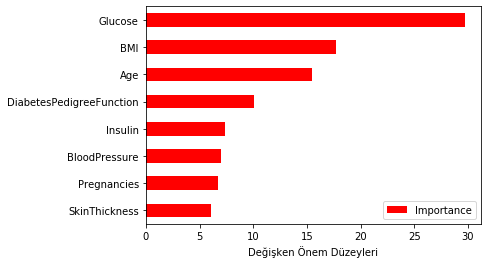

In [94]:
Importance.sort_values(by = "Importance", axis =0, ascending =True).plot(kind = "barh", color ="r")
plt.xlabel ("Değişken Önem Düzeyleri")